## This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. The elbow technique
#### 4. k-Means Clustering
#### 5. Descriptive statistics

## 1. Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# Import Data set

path = r'/Users/neroshakrishna/Desktop/P/Learning/Data_Analysis/CareerFoundry/Data Immersion/Achievement_6/WorldHappiness'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'merged_data.csv'), index_col = False)

In [4]:
df.head()

,Unnamed: 0,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
# Removing column 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])

In [19]:
# Removing columns 'country', 'year' and 'happiness_rank' because it of categorical type

df = df.drop(columns = ['country', 'happiness_rank', 'year'])


In [20]:
df.head()

,happiness_score,economy,family,health,freedom,trust,generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


## The elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

[-1834.5968256624087,
 -917.7105823858824,
 -577.1952036729355,
 -437.714912030217,
 -361.43097134943605,
 -286.5389179710759,
 -250.99922578812703,
 -224.72888175565436,
 -204.95151171155288]

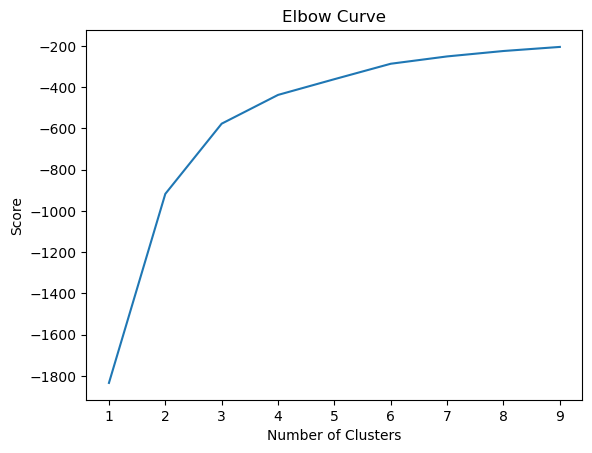

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Q4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
### I chose 2 clusters based on the elbow method. The method helps identify a point where increasing the number of clusters doesn't significantly reduce variation. As we can observer from the graph there are two elbows in the plot, with the change in slope being most pronounced at k=2, suggesting that adding more clusters beyond this point doesn't provide substantial improvement. Therefore, 2 clusters were chosen.

## k-Means Clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [39]:
df['clusters'] = kmeans.fit_predict(df)

/Users/neroshakrishna/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
df.head()

,happiness_score,economy,family,health,freedom,trust,generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [41]:
df['clusters'].value_counts()

clusters
0    366
2    233
1    183
Name: count, dtype: int64

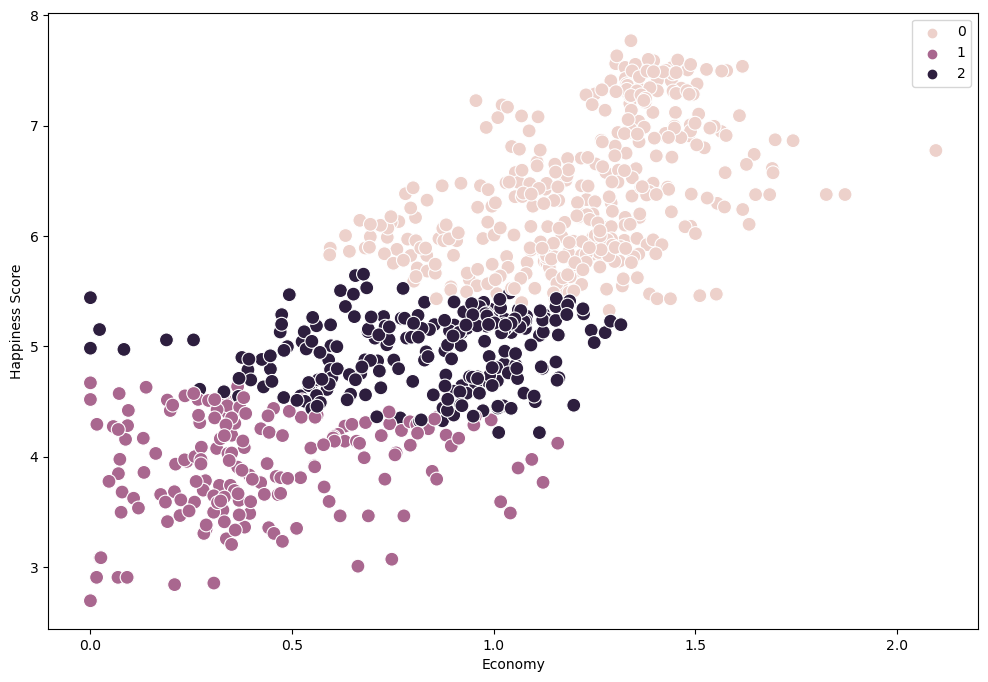

In [42]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['economy'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

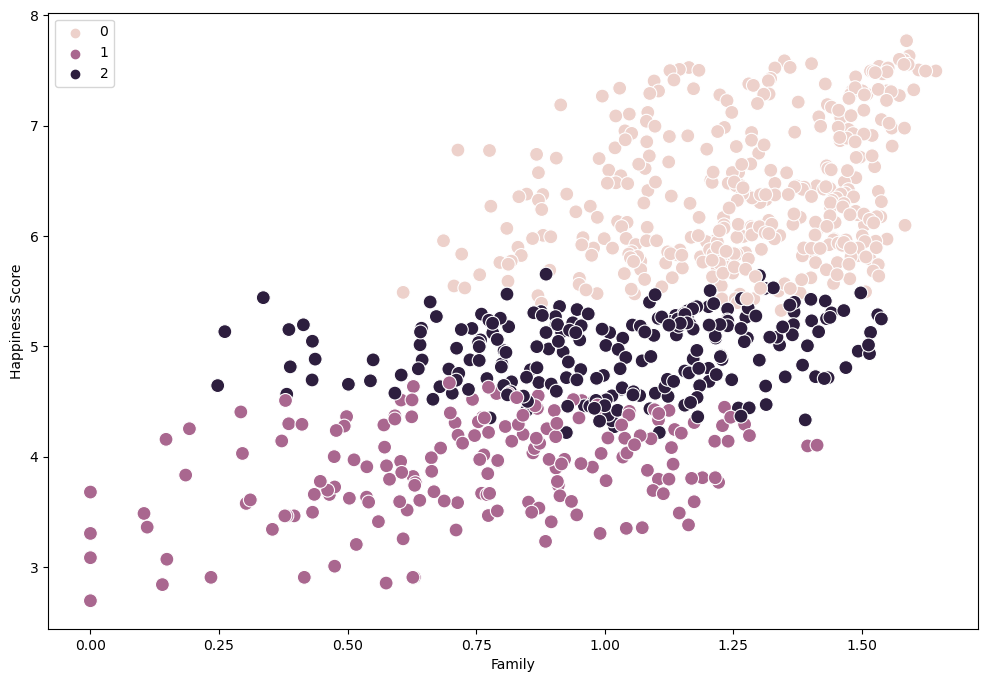

In [43]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['family'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Family') 
plt.ylabel('Happiness Score') 
plt.show()

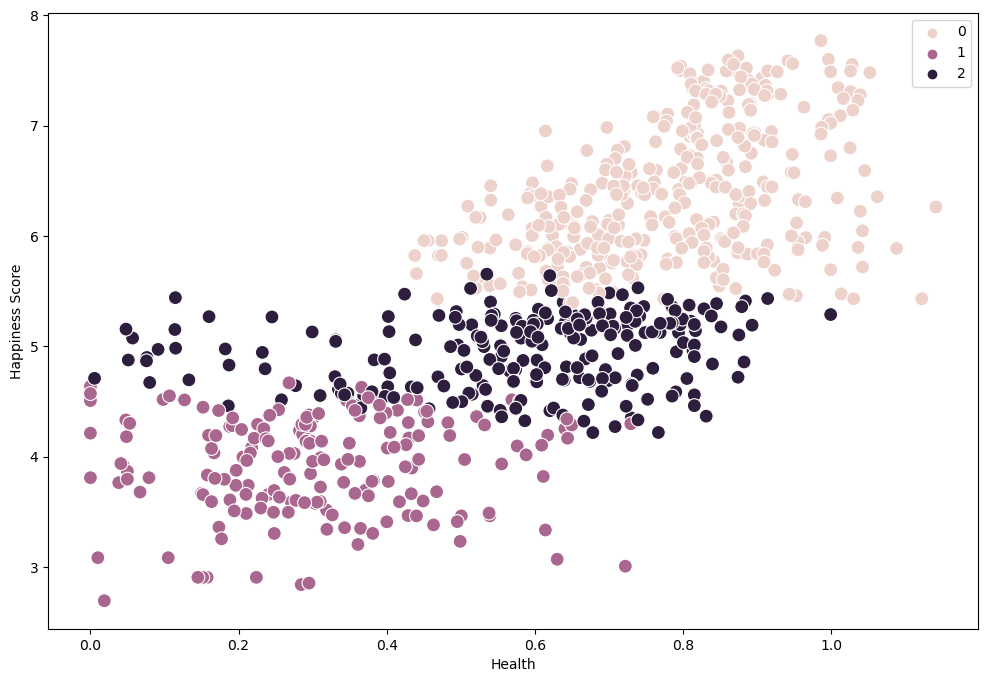

In [45]:
# Plot the clusters for the "Happiness Score" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['health'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Health') 
plt.ylabel('Happiness Score') 
plt.show()

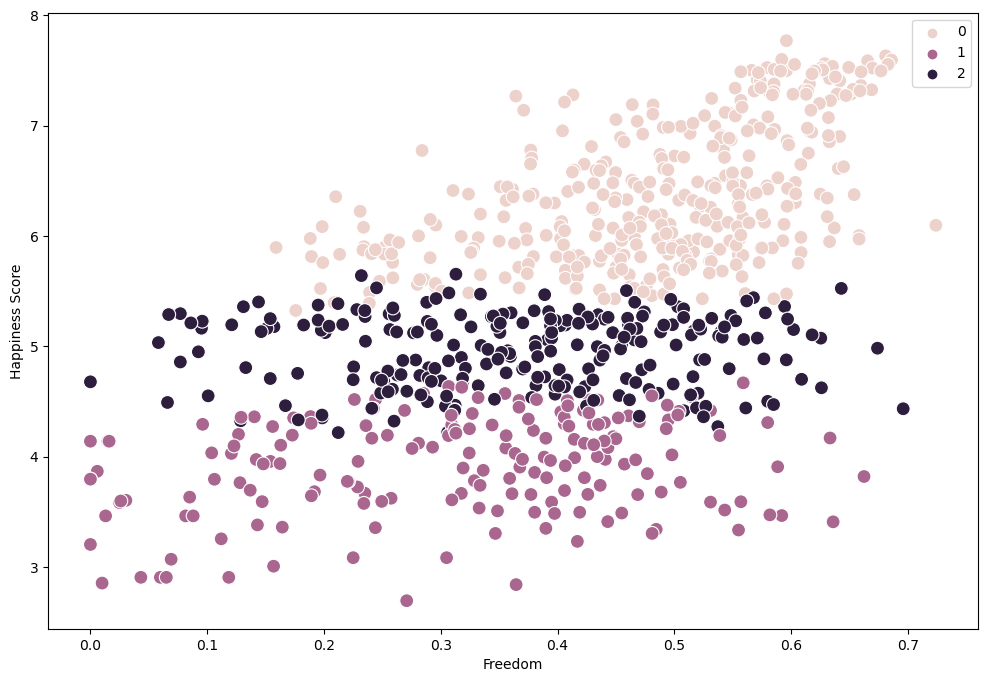

In [46]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['freedom'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Freedom') 
plt.ylabel('Happiness Score') 
plt.show()

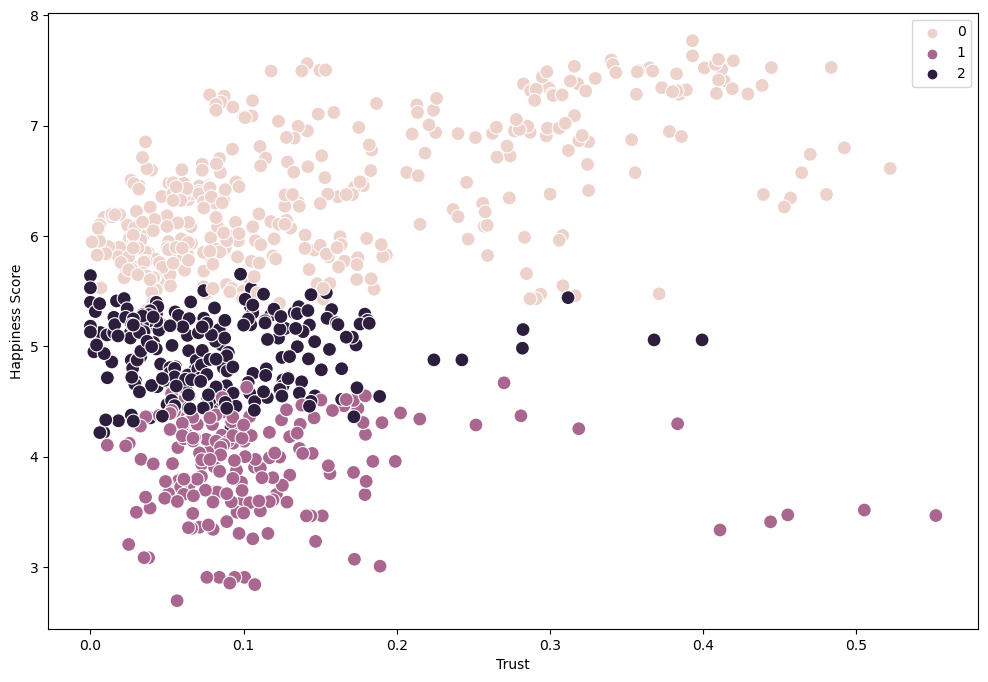

In [47]:
# Plot the clusters for the "Happiness Score" and "Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['trust'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Trust') 
plt.ylabel('Happiness Score') 
plt.show()

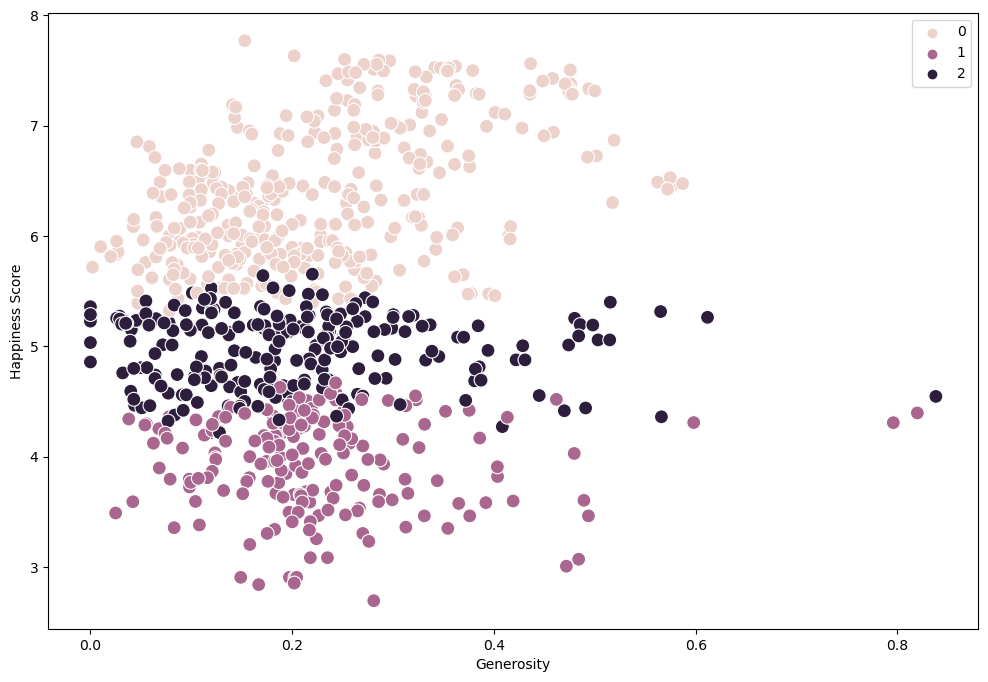

In [48]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['generosity'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score') 
plt.show()

## Q8. Discuss how and why the clusters make sense. 
### The plots reveal distinct clusters with some degree of overlap. Analyzing the patterns, we observe that the pink cluster comprises countries characterized by high levels of Economy (GDP per capita), Social Support, Trust, Freedom, Health, and Generosity, resulting in a high happiness score. In contrast, the dark purple cluster exhibits moderate values for these attributes, translating to a moderate happiness score. Finally, the purple cluster is associated with low levels of Economy, Social Support, Trust, Freedom, Health, and Generosity, indicating the lowest happiness score among the clusters. This analysis provides insights into the relationship between specific attributes and the overall happiness scores within different clusters.

## Descriptive statistics

In [49]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [50]:
df.groupby('cluster').agg({'economy':['mean', 'median'], 
                         'health':['mean', 'median'], 
                         'family':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

economy             health              family           \
                 mean   median      mean    median      mean   median   
cluster                                                                 
dark purple  0.826469  0.88600  0.584037  0.609540  1.027265  1.04103   
pink         1.220536  1.25107  0.780891  0.796638  1.270852  1.29150   
purple       0.421125  0.35900  0.311598  0.297590  0.758570  0.77416   

            happiness_score         
                       mean median  
cluster                             
dark purple        4.953219  5.007  
pink               6.377385  6.294  
purple             3.924421  3.974

### The Pink Cluster exhibits the highest mean and median economy, indicating that countries in this cluster generally have a high GDP per capita. Conversely, the Purple Cluster has the lowest mean and median economy, suggesting lower economic prosperity.

### Similar to the economy, the Pink Cluster has the highest mean and median health scores, indicating better overall health conditions. The Purple Cluster, on the other hand, exhibits lower health scores on average.

### The Pink Cluster demonstrates the highest mean and median family scores, suggesting strong social support and family bonds. The Dark Purple Cluster follows with moderate family scores, while the Purple Cluster has the lowest family scores.

### The Pink Cluster, characterized by high economy, health, and family scores, also has the highest mean and median happiness scores. The Dark Purple Cluster follows with moderate happiness scores, while the Purple Cluster has the lowest happiness scores on average.

## Q10. Propose what these results could be useful for in future steps of an analytics pipeline.

### Governments and policymakers can use the insights to tailor policies and interventions based on the specific needs of each cluster. For example, the Pink Cluster, characterized by high prosperity and well-being, may benefit from policies focused on sustaining economic growth, while the Purple Cluster may require targeted initiatives to improve economic and social indicators.

### Countries within each cluster can benchmark their performance against the cluster's average. This allows for realistic goal setting and helps countries identify areas where they excel or need improvement compared to their cluster peers.